In [2]:
# 기본 패키지 불러오기

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import folium 
from folium import plugins

import plotly
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

pd.set_option("display.max_rows", 100)

In [3]:
# csv 파일 불러오기 csv 파일 불러오기

"""
Case=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/Case.csv")
Region=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/Region.csv")
Time=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/Time.csv")
TimeGender=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/TimeGender.csv")
TimeProvince=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/TimeProvince.csv")
"""

PatientInfo=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/PatientInfo.csv")
PatientRoute=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/PatientRoute.csv")
SeoulFloating=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/SeoulFloating.csv")
TimeAge=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/TimeAge.csv")


In [ ]:
# 연령대 별 누적 확진자 수
fig = px.bar(TimeAge, x='date', y='confirmed',
             hover_data=['age'], color='age', )

fig.update_layout(title='age in contracting an infection')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



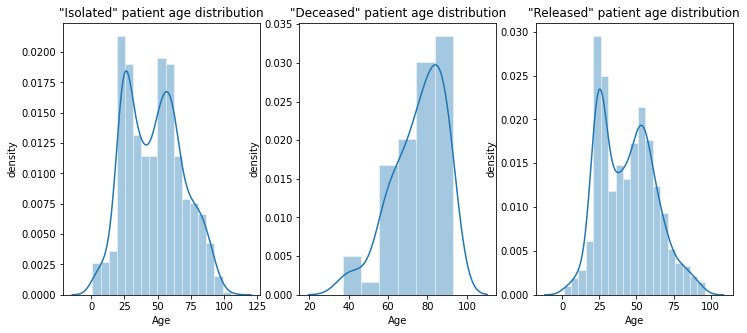

In [ ]:
# 나이별 환자 상태 분석

PatientInfo['age_2020'] = 2020 - PatientInfo['birth_year'] + 1 # 환자들 나이 구하기

release = PatientInfo.query('state == "released"') # 조건 부합 데이터 추출 (환자 상태가 released)
isolate = PatientInfo.query('state == "isolated"') # 조건 부합 데이터 추출 (환자 상태가 isolate)
decease = PatientInfo.query('state == "deceased"') # 조건 부합 데이터 추출 (환자 상태가 decease)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) # plot 1행 3열
fig.set_size_inches(12,5)  # plot 크기

sns.set_style("darkgrid") # plot의 그래프 grid 그리기
sns.distplot(isolate['age_2020'].dropna(), ax = ax1) # 첫 번째 plot - 환자 상태가 isolate인 그래프 display  
ax1.set(title = '"Isolated" patient age distribution',xlabel = 'Age', ylabel = 'density')  # Plot 제목, x, y label 설정

sns.set_style("darkgrid")
sns.distplot(decease['age_2020'].dropna(), ax = ax2) # 두 번째 plot - 환자 상태가 decease인 그래프 display    
ax2.set(title = '"Deceased" patient age distribution', xlabel = 'Age', ylabel = 'density')

sns.set_style("darkgrid")
sns.distplot(release['age_2020'].dropna(), ax = ax3) # 세 번째 plot - 환자 상태가 release인 그래프 display 
ax3.set(title = '"Released" patient age distribution', xlabel = 'Age', ylabel = 'density')

plt.show()

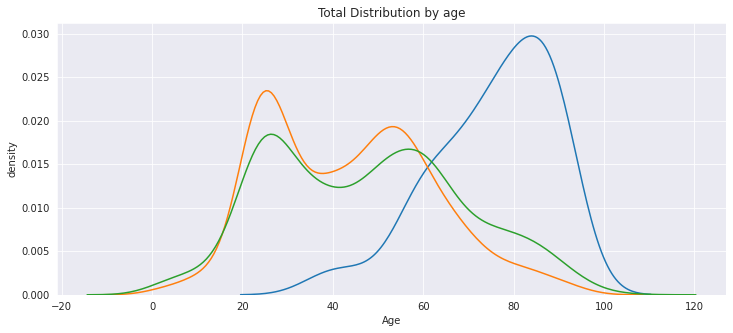

In [ ]:
# 나이별 환자 상태 분석 - 위 3개 그래프 합침.
# 주황색 - 감염자
# 초록색 - 회복자
# 파란색 - 사망자 
plt.figure(figsize = (12,5))
sns.set_style("darkgrid")
sns.kdeplot(decease['age_2020'].dropna(), label = 'deceased')
sns.kdeplot(release['age_2020'].dropna(), label = 'released')
sns.kdeplot(isolate['age_2020'].dropna(), label = 'confirmed')

plt.title('Total Distribution by age')
plt.xlabel('Age'); plt.ylabel('density')
plt.show()

In [ ]:
# 나이대 별 사망자 누적을 날짜별로 나눠 봄

timeAge_Date = TimeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['deceased'] ##  사망자만 추출

fig = go.Figure()
for col in timeAge_Date['deceased'].columns:
    fig.add_trace(go.Scatter(x=timeAge_Date.index,y= timeAge_Date['deceased'][col],
                 mode='lines+markers', name=col))

fig.update_layout(title='age distribution of Deceased patient')
fig.show()

In [ ]:
# 나이대 별 확진자 누적을 날짜별로 나눠 봄

timeAge_Date = TimeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['confirmed']

fig = go.Figure()
for col in timeAge_Date['confirmed'].columns:
    fig.add_trace(go.Scatter(x=timeAge_Date.index,y= timeAge_Date['confirmed'][col],
                 mode='lines+markers', name=col))

fig.update_layout(title='age distribution of confirmed patient')
fig.show()

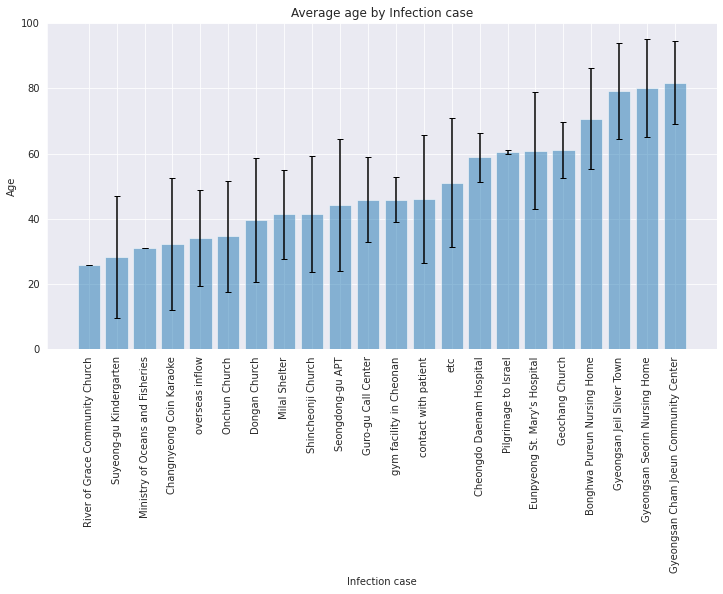

In [ ]:
# 감염 경로 plot

age_by_infection_case = PatientInfo[['infection_case','age_2020']].dropna()\
.groupby('infection_case')['age_2020']\
.agg(['mean', 'std']).fillna(0)\
.sort_values('mean')

plt.figure(figsize = (12,6))
plt.bar(x = age_by_infection_case.index,
        yerr = age_by_infection_case['std'],
        height = age_by_infection_case['mean'],
        alpha = 0.5, ecolor = 'black', capsize = 3)
plt.xticks(rotation=90)
plt.title('Average age by Infection case')
plt.ylabel('Age'); plt.xlabel('Infection case')
plt.show()

del age_by_infection_case

In [ ]:
# 전체 나이 감염 경로
# 50대 이상 고령층 감염 경로 

info_all = PatientInfo[PatientInfo.age !=''] # 전체 나이

info_20 = PatientInfo[PatientInfo.age =='20s'] # 20대
info_50 = PatientInfo[PatientInfo.age =='50s'] # 50대
info_60 = PatientInfo[PatientInfo.age =='60s'] # 60대
info_70 = PatientInfo[PatientInfo.age =='70s'] # 70대
info_80 = PatientInfo[PatientInfo.age =='80s'] # 80대 전체 나이 감염 경로

info_high = PatientInfo[PatientInfo.age >'40s'] # 50대 이상

In [ ]:
info_all['infection_case'] = info_all['infection_case'].fillna("NA")

info_all = info_all.sort_values(by=['confirmed_date'], axis=0)
counts = pd.get_dummies(info_all['infection_case']).cumsum()
counts = info_all[["confirmed_date","infection_case"]].join(counts)

counts["summary_infect"] = [ list(counts[list(counts.infection_case)[i]])[i] for i in range(0, len(counts)) ]
counts = counts.drop_duplicates(["confirmed_date","infection_case"], keep="last")
counts = counts.sort_values(by=['confirmed_date'], axis=0)

In [ ]:
fig = go.Figure()
fig = px.line(counts, x='confirmed_date', y='summary_infect',
              color="infection_case",
              line_group="infection_case", hover_name="infection_case")
fig.update_layout(title='All age infection_case' , showlegend=True)

fig.show()

In [ ]:
info_20['infection_case'] = info_20['infection_case'].fillna("NA")

info_20 = info_20.sort_values(by=['confirmed_date'], axis=0)
counts = pd.get_dummies(info_20['infection_case']).cumsum()  # 관계성을 알기 위해 수치형 데이터로 변환
counts = info_20[["confirmed_date","infection_case"]].join(counts) 

counts["summary_infect"] = [ list(counts[list(counts.infection_case)[i]])[i] for i in range(0, len(counts)) ]
counts = counts.drop_duplicates(["confirmed_date","infection_case"], keep="last")
counts = counts.sort_values(by=['confirmed_date'], axis=0)

fig = go.Figure()
fig = px.line(counts, x='confirmed_date', y='summary_infect',
              color="infection_case",
              line_group="infection_case", hover_name="infection_case")
fig.update_layout(title='20s' , showlegend=True)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
info_high['infection_case'] = info_high['infection_case'].fillna("NA")

info_high = info_high.sort_values(by=['confirmed_date'], axis=0)
counts = pd.get_dummies(info_high['infection_case']).cumsum()  # 관계성을 알기 위해 수치형 데이터로 변환
counts = info_high[["confirmed_date","infection_case"]].join(counts) 

counts["summary_infect"] = [ list(counts[list(counts.infection_case)[i]])[i] for i in range(0, len(counts)) ]
counts = counts.drop_duplicates(["confirmed_date","infection_case"], keep="last")
counts = counts.sort_values(by=['confirmed_date'], axis=0)

fig = go.Figure()
fig = px.line(counts, x='confirmed_date', y='summary_infect',
              color="infection_case",
              line_group="infection_case", hover_name="infection_case")
fig.update_layout(title='higher than 50s' , showlegend=True)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
info_50['infection_case'] = info_50['infection_case'].fillna("NA")

info_50 = info_50.sort_values(by=['confirmed_date'], axis=0)
counts = pd.get_dummies(info_50['infection_case']).cumsum()  # 관계성을 알기 위해 수치형 데이터로 변환
counts = info_50[["confirmed_date","infection_case"]].join(counts) 

counts["summary_infect"] = [ list(counts[list(counts.infection_case)[i]])[i] for i in range(0, len(counts)) ]
counts = counts.drop_duplicates(["confirmed_date","infection_case"], keep="last")
counts = counts.sort_values(by=['confirmed_date'], axis=0)

fig = go.Figure()
fig = px.line(counts, x='confirmed_date', y='summary_infect',
              color="infection_case",
              line_group="infection_case", hover_name="infection_case")
fig.update_layout(title='50s' , showlegend=True)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
info_60['infection_case'] = info_60['infection_case'].fillna("NA")

info_60 = info_60.sort_values(by=['confirmed_date'], axis=0)
counts = pd.get_dummies(info_60['infection_case']).cumsum()  # 관계성을 알기 위해 수치형 데이터로 변환
counts = info_60[["confirmed_date","infection_case"]].join(counts) 

counts["summary_infect"] = [ list(counts[list(counts.infection_case)[i]])[i] for i in range(0, len(counts)) ]
counts = counts.drop_duplicates(["confirmed_date","infection_case"], keep="last")
counts = counts.sort_values(by=['confirmed_date'], axis=0)

fig = go.Figure()
fig = px.line(counts, x='confirmed_date', y='summary_infect',
              color="infection_case",
              line_group="infection_case", hover_name="infection_case")
fig.update_layout(title='60s' , showlegend=True)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
info_70['infection_case'] = info_70['infection_case'].fillna("NA")

info_70 = info_70.sort_values(by=['confirmed_date'], axis=0)
counts = pd.get_dummies(info_70['infection_case']).cumsum()  # 관계성을 알기 위해 수치형 데이터로 변환
counts = info_70[["confirmed_date","infection_case"]].join(counts) 

counts["summary_infect"] = [ list(counts[list(counts.infection_case)[i]])[i] for i in range(0, len(counts)) ]
counts = counts.drop_duplicates(["confirmed_date","infection_case"], keep="last")
counts = counts.sort_values(by=['confirmed_date'], axis=0)

fig = go.Figure()
fig = px.line(counts, x='confirmed_date', y='summary_infect',
              color="infection_case",
              line_group="infection_case", hover_name="infection_case")
fig.update_layout(title='70s' , showlegend=True)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
info_80['infection_case'] = info_80['infection_case'].fillna("NA")

info_80 = info_80.sort_values(by=['confirmed_date'], axis=0)
counts = pd.get_dummies(info_80['infection_case']).cumsum()  # 관계성을 알기 위해 수치형 데이터로 변환
counts = info_80[["confirmed_date","infection_case"]].join(counts) 

counts["summary_infect"] = [ list(counts[list(counts.infection_case)[i]])[i] for i in range(0, len(counts)) ]
counts = counts.drop_duplicates(["confirmed_date","infection_case"], keep="last")
counts = counts.sort_values(by=['confirmed_date'], axis=0)

fig = go.Figure()
fig = px.line(counts, x='confirmed_date', y='summary_infect',
              color="infection_case",
              line_group="infection_case", hover_name="infection_case")
fig.update_layout(title='80s' , showlegend=True)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#나이대 별 접촉자 수 평균
case_age = pd.DataFrame(PatientInfo.groupby(['age'])['contact_number'].mean())
#결측치가 있는 행 제거 (90대와 100대)
case_age = case_age.dropna(axis=0)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=case_age.index, y=case_age.contact_number, 
                      mode='lines', name='contact_num', 
                      line=dict(color='blue')))
fig.update_layout(
    title="age distribution",
    xaxis_title="Age",
    yaxis_title="contact_num"
    )

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
#유동인구 연령대별로 분류

## 이건 다른 사람들꺼 다시 보면서 수정할 수 있으면 수정하는게 좋을 듯 함.


# 필요 데이터만 추출
floating_20= SeoulFloating.query('birth_year==20')
floating_30= SeoulFloating.query('birth_year==30')
floating_40= SeoulFloating.query('birth_year==40')
floating_50= SeoulFloating.query('birth_year==50')
floating_60= SeoulFloating.query('birth_year==60')
floating_70= SeoulFloating.query('birth_year==70')

#dataFrame에서 date, fp_num 행 외에는 필요가 없으므로 이들만 남겨둠. 
floating_20 = floating_20.loc[:,['date', 'fp_num']]
floating_30 = floating_30.loc[:,['date', 'fp_num']]
floating_40 = floating_40.loc[:,['date', 'fp_num']]
floating_50 = floating_50.loc[:,['date', 'fp_num']]
floating_60 = floating_60.loc[:,['date', 'fp_num']]
floating_70 = floating_70.loc[:,['date', 'fp_num']]

#각 날짜에 해당하는 인원 수 합치기
floating_20 = floating_20.groupby(['date'])[['fp_num']].sum()
floating_30 = floating_30.groupby(['date'])[['fp_num']].sum()
floating_40 = floating_40.groupby(['date'])[['fp_num']].sum()
floating_50 = floating_50.groupby(['date'])[['fp_num']].sum()
floating_60 = floating_60.groupby(['date'])[['fp_num']].sum()
floating_70 = floating_70.groupby(['date'])[['fp_num']].sum()

#날짜를 1월 22일부터로 설정. (코로나 확진 환자 처음 생긴 날)
floating_20_date_modify = floating_20[21:]
floating_30_date_modify = floating_30[21:]
floating_40_date_modify = floating_40[21:]
floating_50_date_modify = floating_50[21:]
floating_60_date_modify = floating_60[21:]
floating_70_date_modify = floating_70[21:]

#index 초기화해주기
floating_20_date_modify1 = floating_20_date_modify.reset_index()
floating_30_date_modify1 = floating_30_date_modify.reset_index()
floating_40_date_modify1 = floating_40_date_modify.reset_index()
floating_50_date_modify1 = floating_50_date_modify.reset_index()
floating_60_date_modify1 = floating_60_date_modify.reset_index()
floating_70_date_modify1 = floating_70_date_modify.reset_index()

In [ ]:
floating_20_date_modify1.at[32, 'fp_num'] = floating_20_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_30_date_modify1.at[32, 'fp_num'] = floating_30_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_40_date_modify1.at[32, 'fp_num'] = floating_40_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_50_date_modify1.at[32, 'fp_num'] = floating_50_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_60_date_modify1.at[32, 'fp_num'] = floating_60_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_70_date_modify1.at[32, 'fp_num'] = floating_70_date_modify1.at[32, 'fp_num']*(1/1.92)

In [ ]:
#서울 사람들만 분류
patient = PatientInfo.query('province == "Seoul"')

#환자 연령대별로 분류
patient_20= patient.query('age=="20s"')
patient_30= patient.query('age=="30s"')
patient_40= patient.query('age=="40s"')
patient_50= patient.query('age=="50s"')
patient_60= patient.query('age=="60s"')
patient_70= patient.query('age=="70s"')

#confirmed_date column만 불러온다
patient_20 = patient_20.loc[:,['confirmed_date']]
patient_30 = patient_30.loc[:,['confirmed_date']]
patient_40 = patient_40.loc[:,['confirmed_date']]
patient_50 = patient_50.loc[:,['confirmed_date']]
patient_60 = patient_60.loc[:,['confirmed_date']]
patient_70 = patient_70.loc[:,['confirmed_date']]

#각 날짜별 사람 수 통합
#인원수 파악을 위해 1이 들어간 column 새로 만들어 준다
patient_20['patient']=np.nan
patient_20.loc[:,['patient']]=1
patient_30['patient']=np.nan
patient_30.loc[:,['patient']]=1
patient_40['patient']=np.nan
patient_40.loc[:,['patient']]=1
patient_50['patient']=np.nan
patient_50.loc[:,['patient']]=1
patient_60['patient']=np.nan
patient_60.loc[:,['patient']]=1
patient_70['patient']=np.nan
patient_70.loc[:,['patient']]=1

#각 날짜별 확진자 수 
patient_20 = patient_20.groupby(['confirmed_date'])[['patient']].sum()
patient_20.columns.name = 'date'
patient_30 = patient_30.groupby(['confirmed_date'])[['patient']].sum()
patient_30.columns.name = 'date'
patient_40 = patient_40.groupby(['confirmed_date'])[['patient']].sum()
patient_40.columns.name = 'date'
patient_50 = patient_50.groupby(['confirmed_date'])[['patient']].sum()
patient_50.columns.name = 'date'
patient_60 = patient_60.groupby(['confirmed_date'])[['patient']].sum()
patient_60.columns.name = 'date'
patient_70 = patient_70.groupby(['confirmed_date'])[['patient']].sum()
patient_70.columns.name = 'date'

#index 초기화
patient_20=patient_20.reset_index()
patient_30=patient_30.reset_index()
patient_40=patient_40.reset_index()
patient_50=patient_50.reset_index()
patient_60=patient_60.reset_index()
patient_70=patient_70.reset_index()

#이후에 merge 할 수 있게 patient data의 column 이름을 floating data의 column과 똑같이 맞춰준다
#또한, 아직 floating data가 2/29일까지 없으므로 floating data는 2/29일까지, 확진자 데이터는 2/29일에서 14일 후인 3/14일까지 나타냈음.
patient_20.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_20_2=patient_20[:21]
patient_30.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_30_2=patient_30[:20]
patient_40.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_40_2=patient_40[:13]
patient_50.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_50_2=patient_50[:21]
patient_60.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_60_2=patient_60[:16]
patient_70.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_70_2=patient_70[:8]

#각 날짜에 대한 유동인구, 확진자 수 한 dataFrame에 묶기
#Nan data에는 0을 넣어줌. 
combine_20_2= pd.merge(floating_20_date_modify1,patient_20_2,how='outer',on='date')
combine_20_2 = combine_20_2.fillna(0)
combine_30_2= pd.merge(floating_30_date_modify1,patient_30_2,how='outer',on='date')
combine_30_2 = combine_30_2.fillna(0)
combine_40_2= pd.merge(floating_40_date_modify1,patient_40_2,how='outer',on='date')
combine_40_2 = combine_40_2.fillna(0)
combine_50_2= pd.merge(floating_50_date_modify1,patient_50_2,how='outer',on='date')
combine_50_2 = combine_50_2.fillna(0)
combine_60_2= pd.merge(floating_60_date_modify1,patient_60_2,how='outer',on='date')
combine_60_2 = combine_60_2.fillna(0)
combine_70_2= pd.merge(floating_70_date_modify1,patient_70_2,how='outer',on='date')
combine_70_2 = combine_70_2.fillna(0)

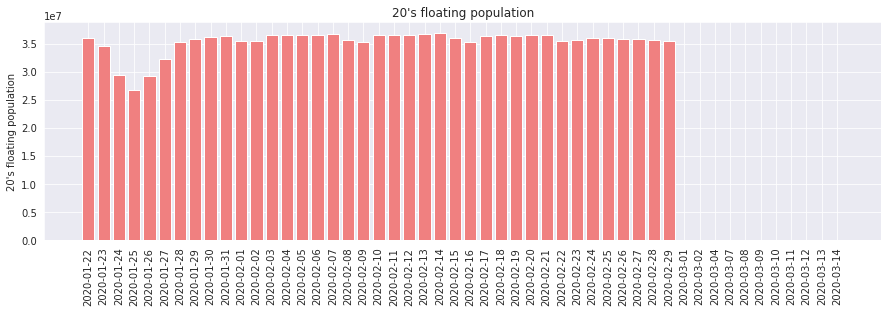

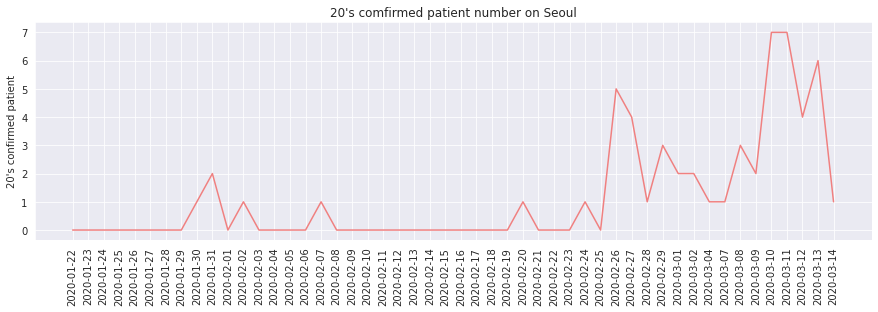

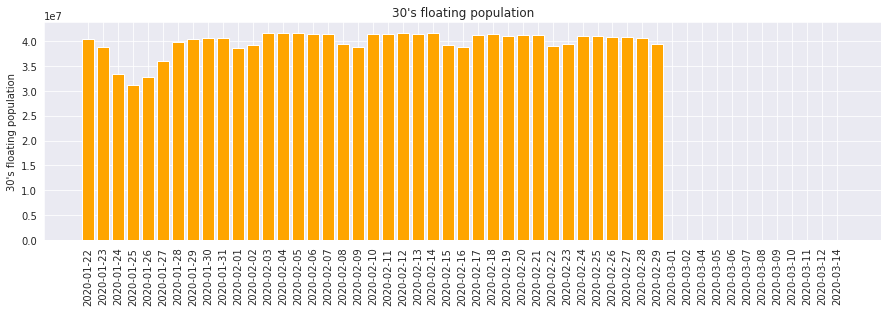

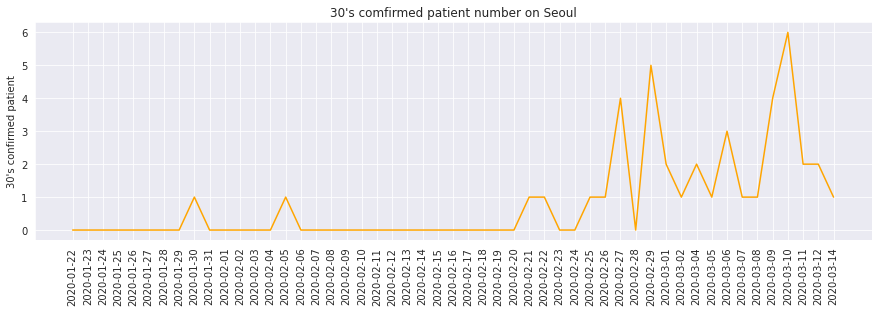

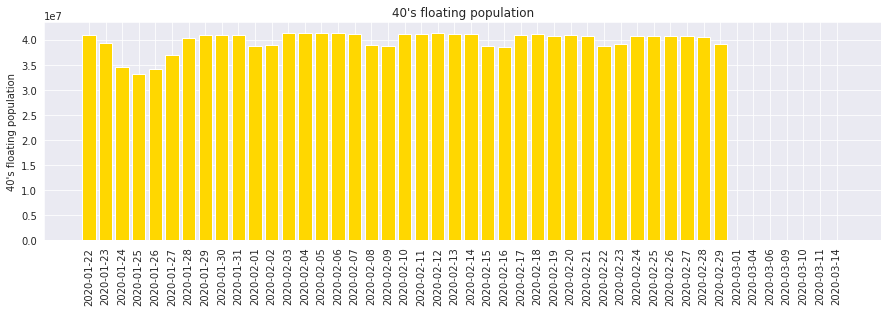

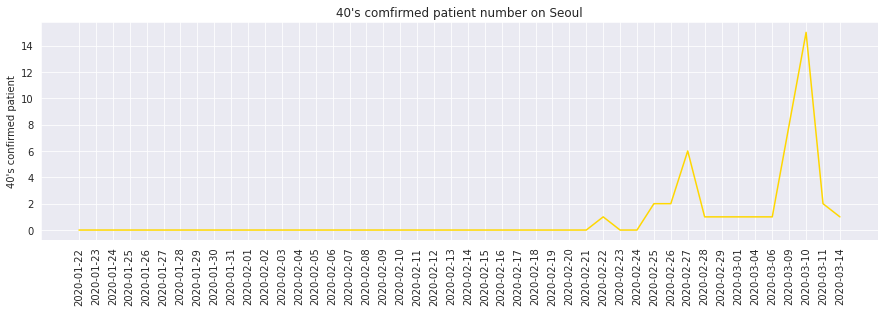

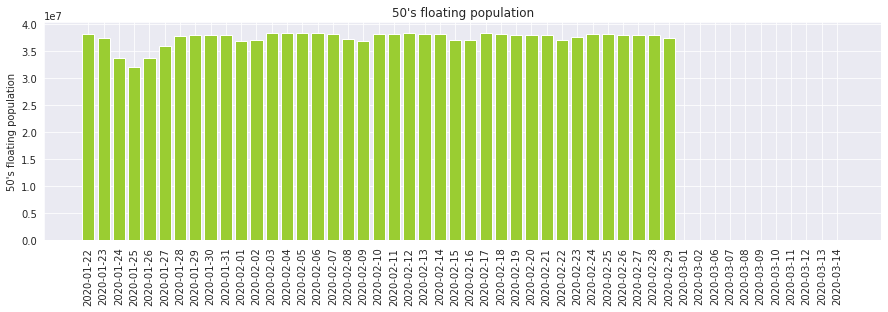

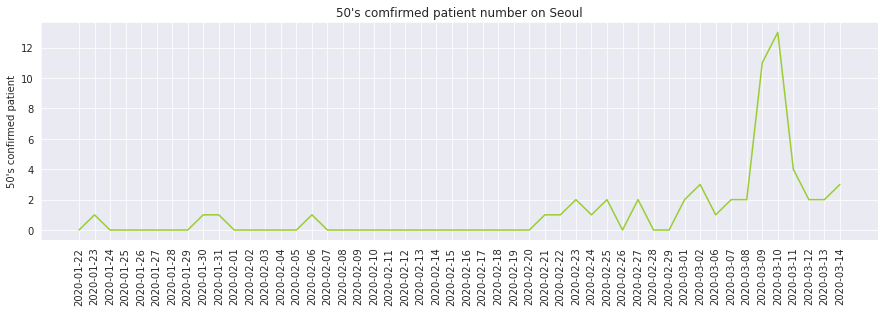

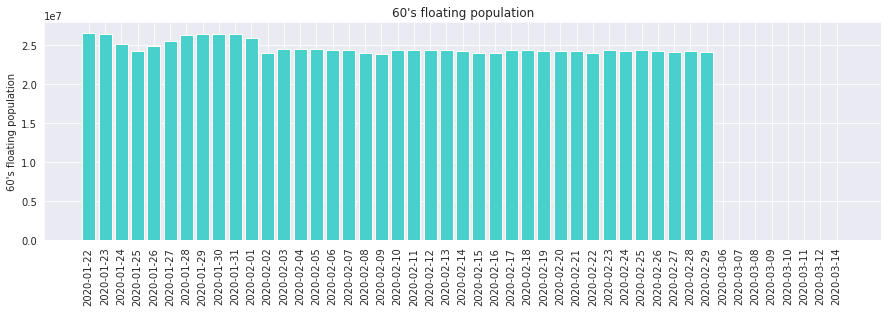

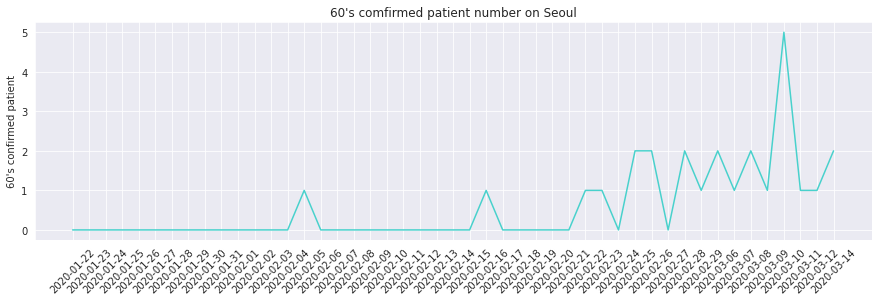

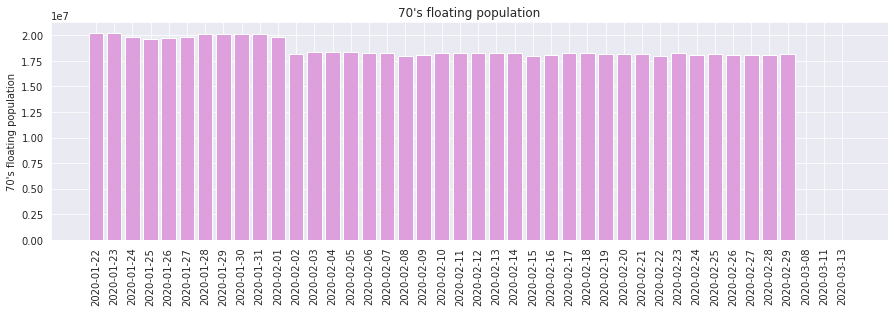

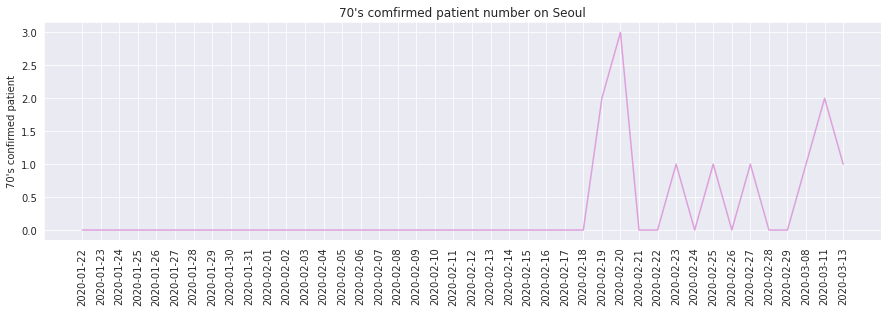

In [ ]:
# 연령별 유동인구 그래프 & 확진자 수
# - skt 통신사를 기준으로 한 것이기 때문에.. 시간별로 하면 유동인구가 없을 새벽 시간에도 높은 유동인구가 잡힘..
# 

#20대
x= combine_20_2['date']
y1= combine_20_2['patient']
y2= combine_20_2['fp_num']

plt.figure(figsize=(15,4))
plt.bar(x,y2,color='lightcoral')
plt.title("20's floating population")
plt.xticks(rotation=90)
plt.ylabel("20's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='lightcoral')
plt.title("20's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("20's confirmed patient")
plt.show()

#30대
x= combine_30_2['date']
y1= combine_30_2['patient']
y2= combine_30_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='orange')
plt.title("30's floating population")
plt.xticks(rotation=90)
plt.ylabel("30's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='orange')
plt.title("30's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("30's confirmed patient")
plt.show()

#40대 
x= combine_40_2['date']
y1= combine_40_2['patient']
y2= combine_40_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='gold')
plt.title("40's floating population")
plt.xticks(rotation=90)
plt.ylabel("40's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='gold')
plt.title("40's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("40's confirmed patient")
plt.show()

#50대
x= combine_50_2['date']
y1= combine_50_2['patient']
y2= combine_50_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='yellowgreen')
plt.title("50's floating population")
plt.xticks(rotation=90)
plt.ylabel("50's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='yellowgreen')
plt.title("50's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("50's confirmed patient")
plt.show()

#60대
x= combine_60_2['date']
y1= combine_60_2['patient']
y2= combine_60_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='mediumturquoise')
plt.title("60's floating population")
plt.xticks(rotation=90)
plt.ylabel("60's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='mediumturquoise')
plt.title("60's comfirmed patient number on Seoul")
plt.xticks(rotation=45)
plt.ylabel("60's confirmed patient")
plt.show()

#70대
x= combine_70_2['date']
y1= combine_70_2['patient']
y2= combine_70_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='plum')
plt.title("70's floating population")
plt.xticks(rotation=90)
plt.ylabel("70's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='plum')
plt.title("70's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("70's confirmed patient")
plt.show()

In [ ]:
p_info_table = pd.read_csv('/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/PatientInfo.csv', parse_dates=['confirmed_date'])
p_route_table = PatientRoute

#p_info_table = pd.read_csv(PatientInfo, parse_dates=['confirmed_date'])

patient_and_spreader = p_info_table[['patient_id', 'infected_by']].dropna(axis = 0).astype('int64')
infection_route = dict()

rir = dict()
# spreader_root = set()
# child = set()
for i in patient_and_spreader.index:
    patient = patient_and_spreader.loc[i, 'patient_id']
    spreader = patient_and_spreader.loc[i, 'infected_by']
    
    rir[patient] = spreader
    if spreader in infection_route:
        infection_route[spreader].append(patient)        
    else:
        infection_route[spreader] = [patient]

# infection_route : 전파자의 patient_id가 key,
# 피전파자의 patient_id 리스트를 value인 dictionary (1 : N)
# rir : reverse infection route
# 피전파자의 patient_id가 key, 전파자의 patient_id가 value인 dictionary (1 : 1)
# infection_route는 여러개의 트리가 모인 그래프 형태

### 트리 구성 & 사이클 제거
spreader_root = set() # 트리 루트 노드를 담는 set
cycles = [] # 사이클 리스트
for spreader in infection_route.keys():
    maybe_cycle = [spreader]
    while spreader in rir:
        spreader = rir[spreader]
        ### 사이클 제거 시작
        if spreader in maybe_cycle:
            idx = maybe_cycle.index(spreader)
            candidate = maybe_cycle[idx:] # 사이클의 후보 : 과거에 발견된 사이클과 
                                          # 겹칠 수 있다.            
            for cycle in cycles: # (for_1) 현재까지 발견한 사이클에서
                for node in candidate: # (for_2) candidate의 사이클을 이루는 노드를
                    if node not in cycle: # 하나씩 검사
                        break # (for_2) break
                else: # 이미 존재하는 사이클과 노드 구성이 일치하는 경우
                      # -> 똑같은 사이클이 존재
                    if len(cycle) == len(candidate): break # (for_1) break
            else: # (for_1)이 정상적으로 종료(==(for_1) break문에 빠지지 x)
                  # -> 새로운 사이클
                cycles.append(maybe_cycle[idx:])
            break
        ### 사이클 제거 끝
        maybe_cycle.append(spreader)
    spreader_root.add(spreader)


<Figure size 432x288 with 0 Axes>

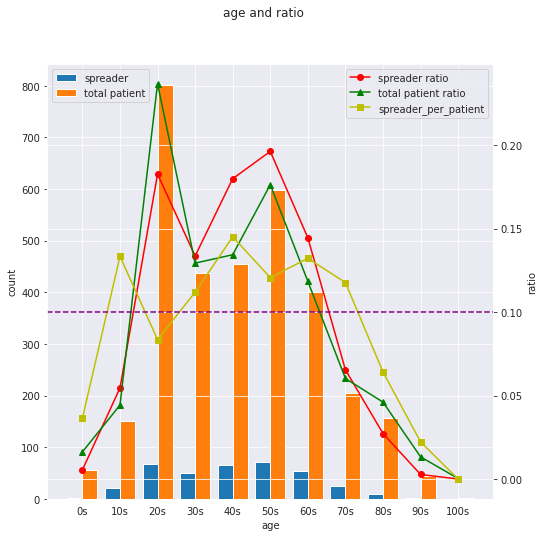

In [ ]:
# 전파자의 나이별 빈도 구하기

# 빨간색 - 해당 나이대의 전파자 비율
# 초록색 - 해당 나이대의 확진자 비율
# 노란색 - 확진자 대비 전파자 비율
## 20대 환자 수가 제일 많지만 확진자 대비 전파자 비율은 10% 이하로 적은 편

spreaders = infection_route.keys() 
spreader_ages = []
hundred_count = 0

for s_id in spreaders:
    spreader = p_info_table[p_info_table['patient_id'] == s_id]
    if len(spreader) == 0:
        continue
    age = spreader['age'].to_string(index = False)
    if age == '100s':
        hundred_count+=1
    else: 
        spreader_ages.append(age)

spreader_age, spreader_count = np.unique(spreader_ages, return_counts=True)
spreader_age = np.append(spreader_age[:-1], ['100s'])
spreader_count = np.append(spreader_count[:-1], [hundred_count])

# 전파자의 나이별 비율
spreader_ratio = spreader_count / len(spreader_ages)

# 전체 환자의 나이별 전파자 빈도
total_ages = [] 
hundred_count = 0;

for i in range(len(p_info_table)):
    patient = p_info_table.iloc[i]
    age = patient['age']
    if age == '100s':
        hundred_count+=1
    else:
        total_ages.append(age)
patient_age, patient_count = np.unique(total_ages, return_counts = True)
patient_age = np.append(patient_age[:-1], ['100s'])
patient_count = np.append(patient_count[:-1], [hundred_count])

# 전체 환자의 나이별 비율
patient_ratio = patient_count / len(p_info_table)

# 전파자 : 전체 환자
spreader_per_patient = spreader_count / patient_count

pos = np.arange(len(patient_age))
width = 0.4
plt.clf()
fig, ax1 = plt.subplots(figsize = (8, 8))
fig.suptitle('age and ratio')

ax1.set_xlabel('age')
ax1.set_ylabel('count')
ax1.set_xticks(pos)
ax1.set_xticklabels(patient_age)
ax1.bar(
    x = pos - width/2, height = spreader_count, 
    width = width, label = 'spreader')
ax1.bar(
    x = pos + width/2, height = patient_count, 
    width = width, label = 'total patient')
ax1.legend(loc = 'upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('ratio')
ax2.plot(pos, spreader_ratio, color = 'r', 
         marker = 'o', label = 'spreader ratio')
ax2.plot(pos, patient_ratio, color = 'g', 
         marker = '^', label = 'total patient ratio')
ax2.plot(pos, spreader_per_patient, color = 'y',
         marker = 's', label = 'spreader_per_patient')
ax2.axhline(y = 0.1, color = 'purple', linestyle = '--')
ax2.legend(loc = 'upper right')

plt.show()